In [1]:
import numpy as np
import matplotlib.pyplot as plt

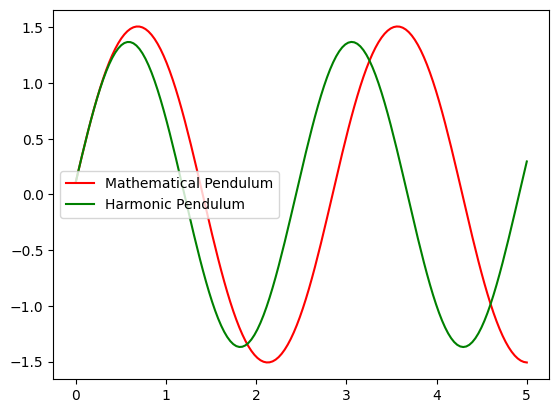

-1.5075339032402237

In [53]:
def rk(y, h, l, harmonic=False):
    """
    Calculates the pendulum's state after one step of the Runge-Kutta method
        y - current state
        h - time unit of step
        l - length of pendulum
        harmonic - changes differential equation from simple mathematical pendulum to harmonic pendulum
    """
    
    g = 9.80665
    dy = lambda x: np.array([x[1], -g/l * np.sin(x[0])])
    if harmonic:
        dy = lambda x: np.array([x[1], -g/l * x[0]])
        
    k1 = h*dy(y)
    k2 = h*dy(y + k1/2)
    k3 = h*dy(y + k2/2)
    k4 = h*dy(y + k3)
    
    return y + (k1 + 2*k2 + 2*k3 + k4)/6

def nihalo(l,t,theta0,dtheta0,n):
    """
    Calculates angular displacement of pendulum at given time t
        l - pendulum length
        t - time
        theta0 - starting angle, at time 0
        dtheta0 - starting angular velocity, at time 0
        n - number of subintervals
    """
    h = t/n
    y0 = [theta0, dtheta0]
    y = []
    y.append(y0)
    
    t_eval = np.linspace(0,t,n)
    i = 0
    for t in t_eval:
        y.append(rk(y[i], h, l))
        i+=1
    
    yh0 = [theta0, dtheta0]
    yh = []
    yh.append(yh0)
    i = 0
    for t in t_eval:
        yh.append(rk(yh[i], h, l, harmonic=True))
        i+=1
    
    y_angles = [tmp[0] for tmp in y]
    y_angles.pop(0)
    yh_angles = [tmp[0] for tmp in yh]
    yh_angles.pop(0)
    
    plt.plot(t_eval, y_angles, color='r', label='Mathematical Pendulum')
    plt.plot(t_eval, yh_angles, color='g', label='Harmonic Pendulum')
    
    plt.legend()
    plt.show()
    return(y_angles[-1])

nihalo(1.5,5,0,3.5,150)

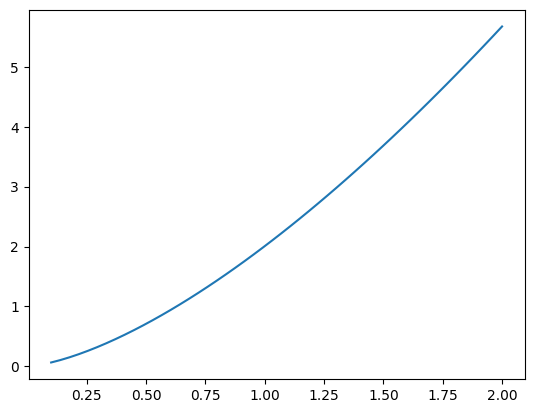

In [52]:
def period_change():
    """
        Plots the period change of pendulum with respect to the initial energy of pendulum, using
            T = 2*pi*sqrt(I/gl), 
        where I is the moment of inertia
    """
    
    l = np.linspace(0.1, 2, 50) #pendulum lengths
    m = 1 #mass 
    g = 9.80665 #grav. acceleration
    
    
    
    Ts = [2*np.pi*np.sqrt(m*length**2/g*length) for length in l]
    
    plt.plot(l, Ts, label="Change in period with respect to change in pendulum length")
    plt.show()
    
       
        
period_change()

Iz grafa je očitno, da razlika v dolžini ročice nihala vpliva na nihajni čas nihala, glede na enačbo
$$ T = 2\pi\sqrt{\frac{I}{gL}}, $$
kjer je $T$ perioda, $I$ moment nihala, $g$ gravitacijski pospešek in $L$ dolžina ročice.